# Изучение закономерностей, определяющих успешность игр

## Описание проекта

Исследование интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Перед нами данные до 2016 года. Предположим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования** - нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года, соответственно, необходимо определить стратегию развития на 2017. 

**Ход исследования**
Данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) будут получены из открытых источников. О качестве данных заранее ничего неизвестно, поэтому перед тем, как приступить к основной части проекта, понадобится получить первые впечатления о данных, после чего проверить их на качество и наличие в них различных ошибок, пропусков и аномалий, если что-то подобное присутствует, на этапе предобработки необходимо будет исправить самые критичные ошибки и привести датафрейм к нормальному, рабочему состоянию. 
 
Таким образом, исследование пройдёт в четыре этапа:
1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных
4. Проверка гипотез
5. Итоговый вывод

## 1. Обзор данных

На данном этапе будет сформирована первая картина о данных, с которыми предстоит работать. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
plt.style.use('bmh') 

In [2]:
try:
    df = pd.read_csv('Данные сборного проекта - 1 "games.csv"')
except:
    df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Получение общей информации о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Согласно документации к данным:

* `Name` — название игры;
* `Platform` — платформа; 
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию;
Данные за 2016 год могут быть неполными.

In [4]:
# Получение информации о названиях столбцов
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

**Вывод по 1-ому разделу**

После получения общей информации, в таблице были выявлены следующие замечания:
1. Названия столбцов написаны с заглавной буквы
2. В столбце `Year_of_Release` информация только о годе, следовательно, в данном случае со значениями этого столбца мы не будем работать как с датой, поэтому тип данных поменяем на целочисленный.
3. В некоторых столбцах есть пропуски, которые надо будет изучить и, где это необходимо, устранить.

## 2. Предобработка данных
На данном этапе будут устранены выявленные проблемы в данных с целью корректной работы с ними на протяжение всего проекта. 

### 2.1. Работа с названиями столбцов

In [5]:
# Приводим названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [6]:
# Проверяем работоспособность кода по смене регистра названий
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Вывод**

Видим, что названия столбцов были приведены к нижнему регистру, что соответсвует хорошему стилю

### 2.2. Работа с пропусками

**Возможные причины, которые могли привести к пропускам:**
1. Сбои при выгрузке датафрейма из базы данных 
2. Ошибки при вводе данных 
3. Возможно, выход некоторых игр задерживался, также, возможно, выход игры затрагивал больше одного года, поэтому в строке с годом нет информации.
4. Что касается оценок, то не все пользователи ставят их, соотвественно, по игре появляются пустые ячейки.

In [7]:
# Считаем количество пропусков в каждом из столбцов
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# Изучаем пропуски в столбце name
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Вывод**

Видна некая закономерность: нет названия игры, нет и жанра, что логично. Пропусков всего два, это очень мало, так что можем удалить данные строки

In [9]:
# Изучаем пропуски в столбце year_of_release
df[df['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


**Вывод**

В данном случае никакой закономерности увидеть нельзя, следовательно, данные строки можно тоже удалить, так как строк с пропущенными значениями мало. 

In [10]:
# Изучаем пропуски в столбцах critic_score
df[df['critic_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [11]:
# Изучаем пропуски в столбце user_score
df[df['user_score'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [12]:
# Изучаем пропуски в столбце rating
df[df['rating'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


**Вывод**

В данном случае видна некая закономерность: если нет значений в столбцах `user_score` и `critic_score`, то нет значений и в столбце `rating`, что также логично. Однако столбец `rating` стоит изучить подробнее, так как там представлена категориальная переменная, а пропуски в столбцах `user_score` и `critic_score` логичней будет оставить без изменений, так как их очень много и правильной замены найти не сможем.

In [13]:
# Изучение пропусков в столбце rating
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Вывод**

В данном случае, пропуски целесообразнее заменить на значение `unknown`, потому что узнать истинную замену данным пропускам у нас не получится, следовательно, самым оптимальным считаю данный вариант. 

In [14]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
# Делаем срез по неизвестному значению  
df_tbd = df[df['user_score'] == 'tbd']
# Считаем сколько таких значений
print(len(df_tbd))

2424


**Вывод**

Также, в столбце `user_score` была выявлена непонятная оценка в виде значения `tbd`. Так как таких значений много и удалять такие строки будет не целесообразно, думаю, что верным решением будет обработать это значение при помощи метода `pd.to_numeric`. Данный столбец отражает количественную переменную, оставлять подобную строку нельзя, так как далее прийдётся работать с этим столбцом и при наличии строки в столбце, код упадёт. 

In [16]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

**Вывод**

В данном столбце непонятных переменных выявлено не было

In [17]:
# Избавляемся от строк с пропусками
df = df.dropna(subset=['name', 'year_of_release'])

In [18]:
# Для корректной работы кода заменяем тип object на тип float64
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [19]:
# Замена пропусков в столбце rating на unknown
df['rating'] = df['rating'].fillna('unknown')

In [20]:
# Проверяем, как обработали пропуски
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Вывод по разделу 2.2.**

В данном разделе были обработаны все пропуски в данных.

### 2.3. Работа с типом данных

In [21]:
# Изменяем тип данных в столбце year_of_release на целочисленный
df['year_of_release'] = df['year_of_release'].astype('int32')

In [22]:
# Проверяем, как отработал код по смене типа данных
df.dtypes.head(3)

name               object
platform           object
year_of_release     int32
dtype: object

**Вывод**

Тип данных обработан, теперь значения в столбце `year_of_release` - целые числа. 

**Вывод по 2-ому разделу**

В данном разделе были устранены все недочёты в данных, следовательно, можно приступать к основной части проекта

## 3. Исследовательский анализ данных

In [23]:
# Считаем суммарные продажи во всех регионах и создаём для этого новый столбец
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


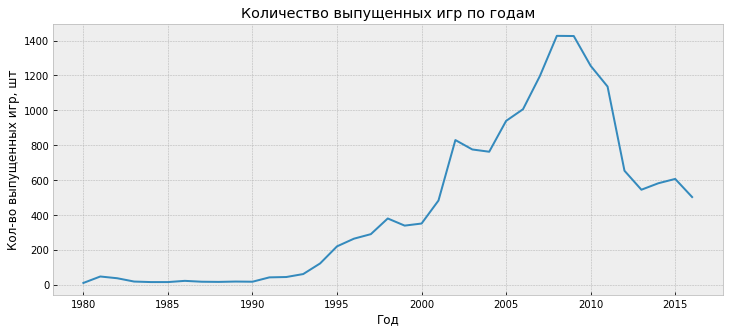

In [24]:
# Смотрим, сколько игр выпускалось в разные годы
(df.groupby('year_of_release')['name'].count()
                                      .plot(kind='line', figsize=(12, 5), grid=True, linewidth=2)
)
plt.title('Количество выпущенных игр по годам')
plt.ylabel('Кол-во выпущенных игр, шт')
plt.xlabel('Год');

**Вывод по количеству выпустившихся игр в разные годы**

По барплоту видно, что с каждым годом количество выпустившихся игр в целом увеличивается, если не выделять отдельные года и не рассматривать единичные случаи. Также необходимо заметить, что данные за весь период нам не нужны, так как чем дальше от текущей даты, тем ниже показатели и они не отражают реальной картины, поэтому на эти годы ориентироваться не стоит. Исходя из этого, было принято решение анализировать только наиболее актульные года. За актуальный период было принято взять промежуток, не позднее 2010 года. 

In [25]:
# Срезаем те года, которые совсем не актуальны для нашего анализа
df_actual = df[df['year_of_release'] >= 2010]

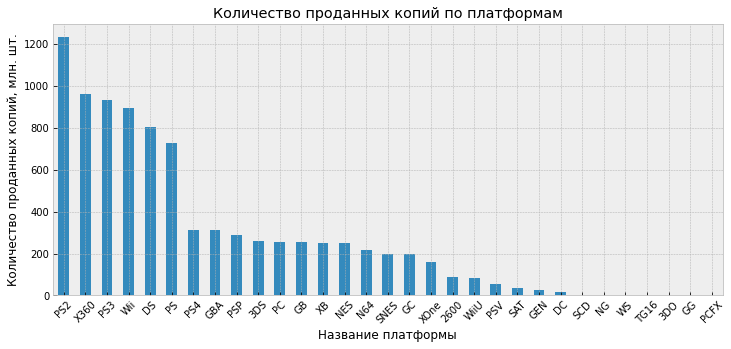

In [26]:
# Изучаем продажи по платформам
(df.groupby('platform')['total_sales'].sum()
                                      .sort_values(ascending=False)
                                      .plot(kind='bar', figsize=(12,5), grid=True)
)
plt.xticks(rotation=45)
plt.title('Количество проданных копий по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий, млн. шт.');

**Вывод по продажам платформ**

По барплоту видим, что наибольшие суммарные продажи были выявлены у следующих платформ:
1. PS2
2. X360
3. PS3

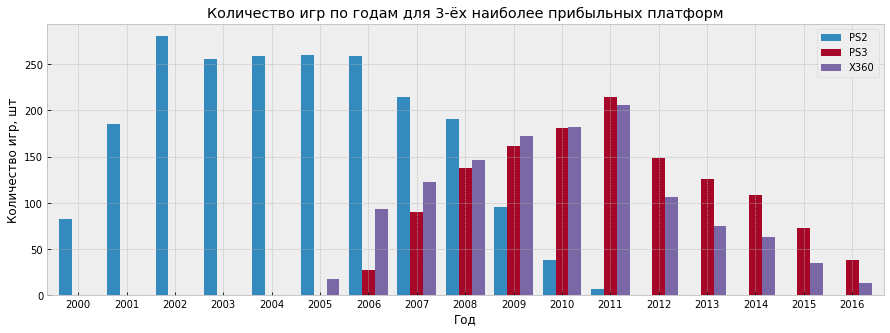

In [27]:
# Считаем количество игр по годам для топ-3 платформ
name_platform = ['PS2', 'X360', 'PS3']
(df[df['platform'].isin(name_platform)].pivot_table(index = 'year_of_release', 
                                                    columns = 'platform', 
                                                    values = 'name', 
                                                    aggfunc = 'count')
                                       .plot(kind = 'bar', 
                                             figsize=(15,5), 
                                             width=0.8)
)
plt.legend()
plt.xlabel('Год')
plt.ylabel('Количество игр, шт')
plt.title('Количество игр по годам для 3-ёх наиболее прибыльных платформ')
plt.xticks(rotation=360);

**Вывод по распределениям**

1. Что касается платформы `PS2`
2. Изучая платформу `X360`
3. Если говорить про платформу `PS3`

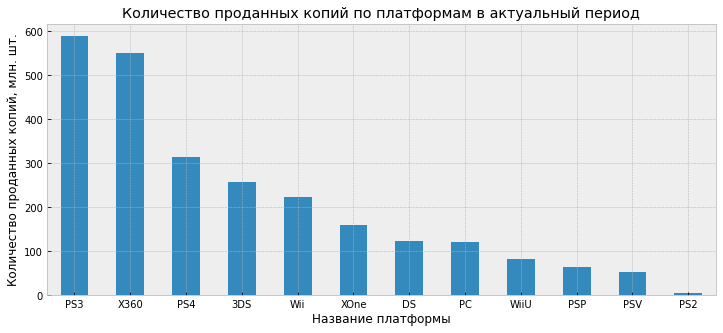

In [28]:
# По актуальным данным изучаем продажи каждой из платформ
(df_actual.groupby('platform')['total_sales'].sum()
                                             .sort_values(ascending=False)
                                             .plot(kind='bar', figsize=(12, 5))
)
plt.xticks(rotation=360)
plt.title('Количество проданных копий по платформам в актуальный период')
plt.xlabel('Название платформы')
plt.ylabel('Количество проданных копий, млн. шт.');

**Вывод по продажам каждой платформы по актуальным данным**

Лидеры по суммарным продажам за период с 2010 по 2016 года: `PS3`, `X360` и `PS4`, а также `3DS`, `Wii` и `XOne`

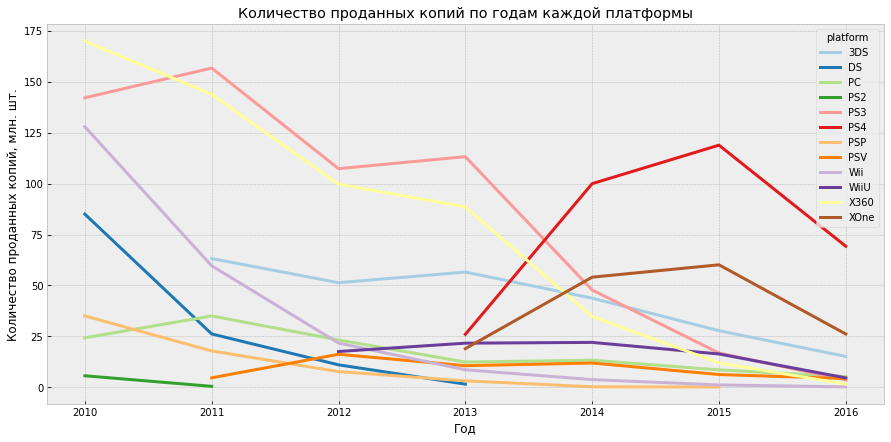

In [29]:
# Строим график, который отразит динамику продаж каждой из платформ
(df_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
.T
.plot(kind='line', figsize=(15, 7), linewidth=3, grid=True, colormap='Paired')
)
plt.title('Количество проданных копий по годам каждой платформы')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн. шт.');

**Вывод по динамике продаж по каждой платформе**

По данному графику можно определённо сказать, что продажи с каждым годом падают, что конечно же логично: когда выходит какой-либо новый продукт, вокруг него начинается ажиотаж, который со временем утихает. 

Однако стоит заметить, что некоторые платформы имеют срок жизни в несколько раз больше, чем их конкуренты, что говорит о большей вовлечённости пользователей к определённой платформе, которую в течение многих лет покупают, хоть и не так интенсивно, как в первое время после релиза. 

Исходя из графика, стоит выделить следующие перспективные платформы:
1. `PS4`
2. `XOne`
3. `X360`
4. `PS3`

Потенциальная перспектива данных платформ определялась на основе того, что они были выпущены в 2013 году и продажи по ним не достигли дна, соответственно, данные платформы еще могут жить и приносить прибыль компании. 

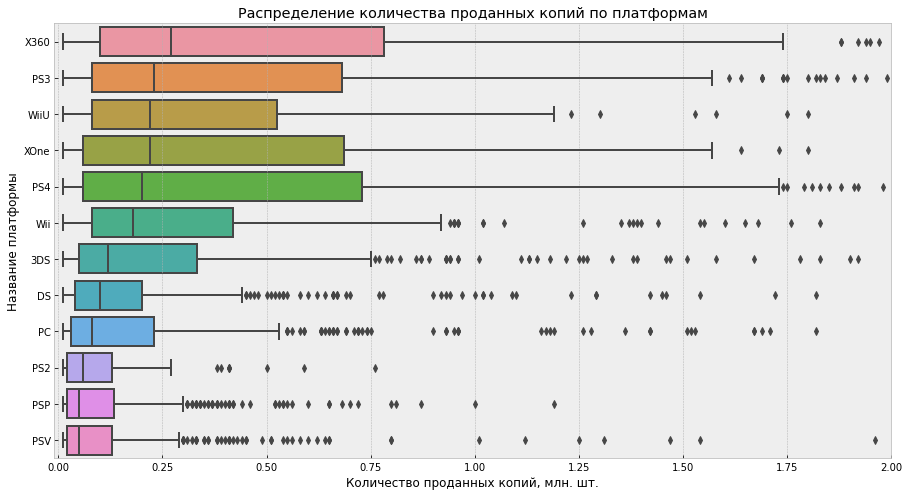

In [30]:
# Изучение распределения
plt.figure(figsize=(15, 8))
sns.boxplot(data = df_actual, y = 'platform', x='total_sales',
            order=df_actual.groupby('platform')['total_sales'].median().sort_values(ascending=False).index)
plt.xlabel('Количество проданных копий, млн. шт.')
plt.ylabel('Название платформы')
plt.title('Распределение количества проданных копий по платформам')
plt.xlim(-0.01, 2);

In [31]:
# Функция для изучения влияния отзывов пользователей и критиков на продажи для самых перспективных платформ
def scatter_plot(platform):
    score = ['critic_score', 'user_score']
    labels = [
    ['Оценка критиков', f'Зависимость количества проданных копий на платформе {platform} от оценок критиков'],
    ['Оценка пользователей', f'Зависимость количества проданных копий на платформе {platform} от оценок пользователей'],
             ]
    labels_dict = dict(zip(score, labels))
    df_actual_platform = df_actual[df_actual['platform'] == platform]
    for i in score:
        df_actual_platform.plot(x=i, y='total_sales', kind='scatter', figsize=(12, 5))
        plt.xlabel(labels_dict[i][0])
        plt.ylabel('Количество проданных копий, млн. шт.')
        plt.title(labels_dict[i][1])

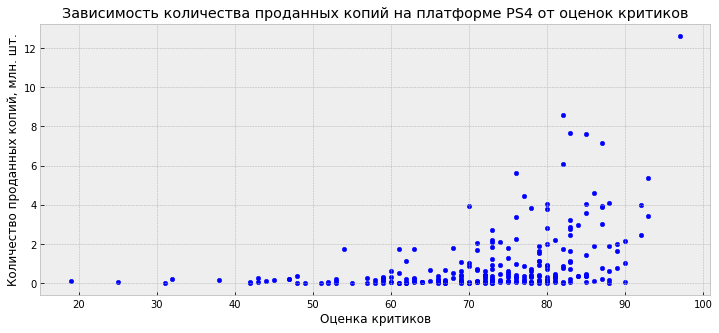

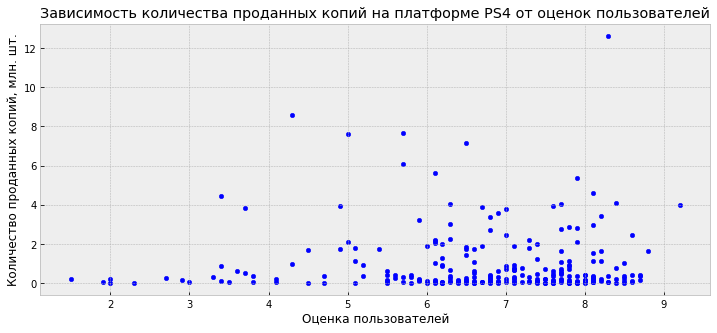

In [32]:
scatter_plot('PS4')

In [33]:
# Считаем коэффициент корреляции-Пирсона
df_actual_ps_4 = df_actual[df_actual['platform'] == 'PS4']
df_actual_ps_4[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


**Вывод по влиянию отзывов на продажи**

Зависимость слишком маленькая

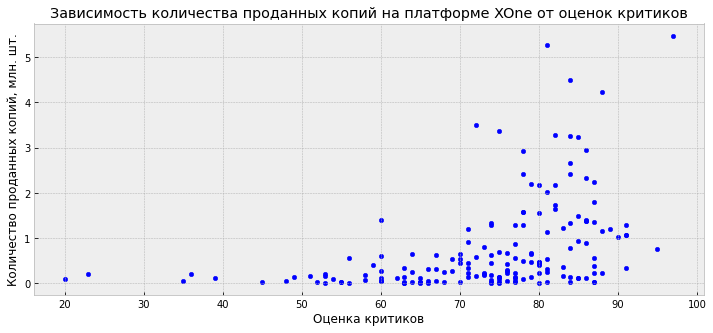

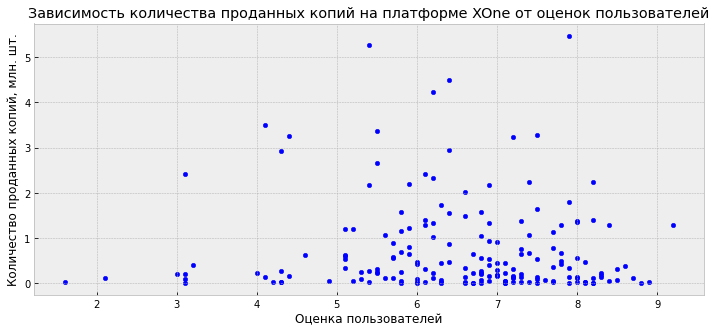

In [34]:
scatter_plot('XOne')

In [35]:
# Считаем коэффициент корреляции-Пирсона
df_actual_xone = df_actual[df_actual['platform'] == 'XOne']
df_actual_xone[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


**Общий вывод по влиянию отзывов на продажи**

Сравнивая по диаграмме рассеяния зависимость между отзывами и продажами по самой популярной платформе и менее полпулярной, то абсолютно точно видно, что корреляция в первом случае выше, чем во втором (так как густота точек во втором случае в разы меньше, чем в первом). 

Также можно заметить тот факт, что отзывы больше влияют на более популярную платформу, так как из графика видно, что чем больше выручка по платформе, тем больше и оценка критиков, а вот что касается менее популярную платформу, то там всё-таки разброс точек больше похож на случайный. 

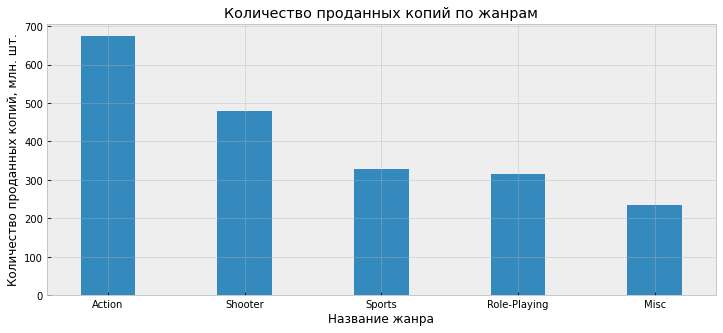

In [36]:
# Визуализируем самые прибыльные жанры
(df_actual.groupby('genre')['total_sales'].sum()
                                          .sort_values(ascending=False)
                                          .head()
                                          .plot(kind='bar', figsize=(12, 5), width=0.4)
)
plt.xticks(rotation=360)
plt.xlabel('Название жанра')
plt.ylabel('Количество проданных копий, млн. шт.')
plt.title('Количество проданных копий по жанрам');

**Вывод по самым прибыльным жанрам**

Что касается самых прибыльных жанров, то на первом месте Action, на втором Shooter и замыкает тройку лидеров жанр Sports. Больше всего люди готовы покупать и играть в экшн-игры, немного меньше покупаются шутеры, а также ещё меньше денег приносят спортивные игры. 

### 3.1. Составляем портрет пользователя каждого региона

#### 3.1.1. Изучение прибыльности платформ

In [37]:
# Прописываем функцию для построения графиков по объёму продаж в разных регионах
def show_bars_for_category_in_region(category_name, category_title):
    # Подготавливаем сетку 1х3 для вывода диаграмм
    fig_reg, axes_reg = plt.subplots(nrows=1, ncols=3, figsize=(21, 4), sharey=True)
    # Задаем расстояние между графиками
    plt.subplots_adjust(hspace=0.4)
    # Регионы, для котрых строим диаграммы
    region_columns = {
        'na_sales':['Северная Америка', 0],
        'eu_sales':['Европа', 1],
        'jp_sales':['Япония', 2],
    }
    # Считаем объемы продаж игр по платформам и построим стобчатую диаграмму
    for k, v in region_columns.items():
        (
            df.groupby(category_name)
                .sum()
                .sort_values(by=k, axis='rows', ascending=False)
                .head(5)
                .plot(
                    kind='bar',
                    grid=True,
                    legend=False,
                    #xlabel=category_title,
                    #ylabel='Объем продаж',
                    title='Количество проданных копий по платформам в регионе: ' + v[0],
                    ec='black',
                    y=k,
                    ax=axes_reg[v[1]],
                    width=0.4
                )
        )
        axes_reg[v[1]].set_xlabel(category_title)
        axes_reg[v[1]].set_ylabel('Количество проданных копий, млн. шт.')
        axes_reg[v[1]].tick_params(labelrotation=360)

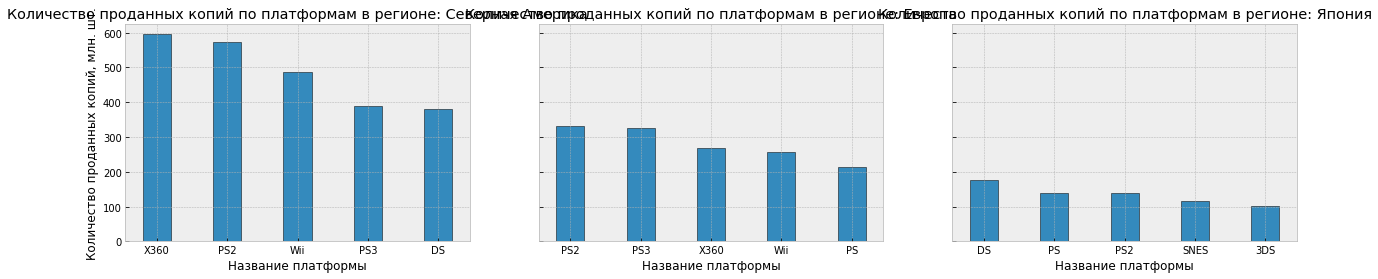

In [38]:
show_bars_for_category_in_region('platform', 'Название платформы')

**Вывод**

Что касается анализируемых регионов, где продавались платформы, то в Северной Америке лучшие продажи показала платформа X360, в Европе PS3, а в Японии - 3DS. Мы видим, что в каждом регионе свои лидеры продаж, это говорит о том, что у людей, проживающих в этих регионах, отличаются и предпочтения к платформам. 

#### 3.1.2. Изучение прибыльности жанров

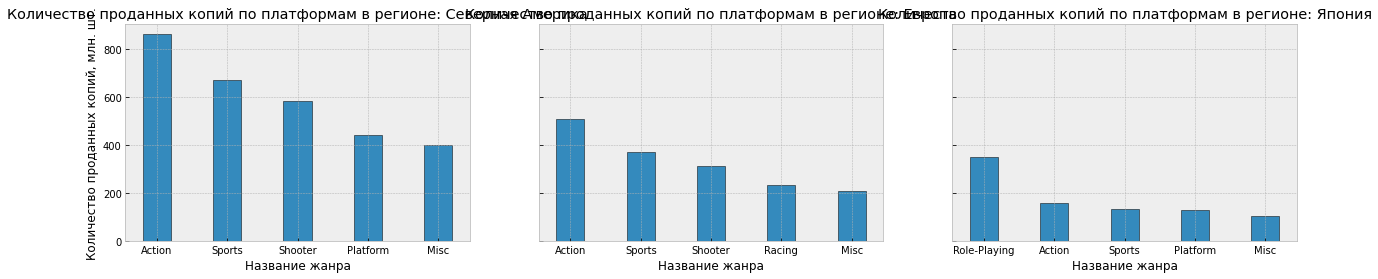

In [39]:
show_bars_for_category_in_region('genre', 'Название жанра')

**Вывод**

Что касается жанров, то в Северной Америке и Европе больше всего продаются экшн-игры. А в Японии преобладают Role-Playing. Стоит заметить, что данный жанр находится далеко от лидирующего месте по продажам в Северной Америке и Европе, что говорит о совершенно разных предпочтениях этих регионов.

#### 3.1.3. Изучение влияния рейтинга от организации ESRB на продажи

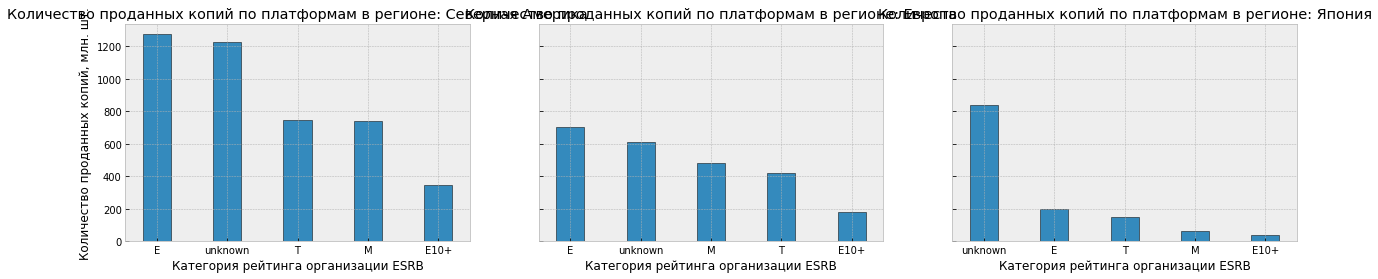

In [40]:
show_bars_for_category_in_region('rating', 'Категория рейтинга организации ESRB')

**Вывод**

Стоит заметить, что рейтинг влияет на продажи, потому что в зависимости от проставленного рейтинга, меняется и сумма продажи по региону. Наиболее распространённая категория рейтинга в Северной Америке и Европе - М, однако Япония здесь также сумела выделиться. Мы видим, что в данном регионе лидируют пропуски, их подавляющее большинство (намного больше, чем других категорий рейтинга). Это говорит о том, что подход к проставлению рейтинга в этой стране сильно отличается от других регионов и данную методику здесь использовать некорректно. 

## 4. Проверка гипотез

#### Гипотеза 1. 

Cформируем нулевую (H₀) и альтернативную (H₁) гипотезы:
- H₀: cредние пользовательские рейтинги платформы Xbox One равны cредним пользовательским рейтингам платформы PC 
- H₁: cредние пользовательские рейтинги платформы Xbox One не равны cредним пользовательским рейтингам платформы PC 

Будет проверяться гипотеза о равенстве средних двух генеральных совокупностей. Также необходимо заметить, что в данном случае нам неважно в какую сторону будет измнение, следовательно, альтернативная гипотеза будет двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны. 

In [41]:
# Создаём датафрейм по платформе Xbox One
df_xbox_one = df_actual[df_actual['platform'] == 'XOne']
# Создаём датафрейм по платформе PC
df_pc = df_actual[df_actual['platform'] == 'PC']
# Игнорируем NaN-ы
df_xbox_one = df_xbox_one[df_xbox_one['user_score'].notna()]
df_pc = df_pc[df_pc['user_score'].notna()]

# Используем статистический метод для проверки гипотезы
alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(df_xbox_one['user_score'], df_pc['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.980998110649032
Не получилось отвергнуть нулевую гипотезу


**Вывод по гипотезе 1**

Средние пользовательские рейтинги платформы Xbox One статзначимо не отличаются от cредних пользовательских рейтингов платформы PC при критическом уровне значимости 1%, следовательно, принимаем H0.

#### Гипотеза 2. 

Сформируем нулевую (H₀) и альтернативную (H₁) гипотезы:
- H₀: средние пользовательские рейтинги жанра Action равны средним пользовательским рейтингам жанра Sports  
- H₁: средние пользовательские рейтинги жанра Action не равны средним пользовательским рейтингам жанра Sports 

Здесь также будет проверяться гипотеза о равенстве средних двух генеральных совокупностей. Опять же замечу, что в данном случае нам неважно в какую сторону будет измнение, следовательно, альтернативная гипотеза будет двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны. 

In [42]:
# Создаём датафрейм по жанру Action
df_action = df_actual[df_actual['genre'] == 'Action']
# Создаём датафрейм по жанру Sports
df_sports = df_actual[df_actual['genre'] == 'Sports']
# Игнорируем NaN-ы
df_action = df_action[df_action['user_score'].notna()]
df_sports = df_sports[df_sports['user_score'].notna()]

# Используем статистический метод для проверки гипотезы
alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(df_action['user_score'], df_sports['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.839124224330309e-19
Отвергаем нулевую гипотезу


**Вывод по гипотезе 2**

Средние пользовательские рейтинги жанра Action имеют статистически значимую разницу со средними пользовательскими рейтингами жанра Sports на статистическом уровне значимости 1%, следовательно, принимаем H1.

## 5. Итоговый вывод

1. Анализируя выпуск игр по всем годам, представленным в датасете, виден значительный рост, начиная с 1993 года. Пик, где выпустилось максимальное количество игр за анализируемый период, прослеживается примерно в 2008 году. Далее, количество выпущенных игр ежегодно уменьшалось и на текущий момент значение выпущенных игр повторяет значение 2001 года. Было принято, в дальнейшем исследование рассматривать только актуальные данные, которые начинаются с 2010 года и заканчиваются текущей датой, так как старые данные лишь вводят в заблуждение и они являются неактуальными.
2. Рассматривая актуальный период данных, такие платформы, как PS3, X360, PS4 показали наибольшее количество проданных копий. 
3. Были выделены следующие перспективные платформы: PS4 (она же и самая перспективная) и XOne по принципу, что они были выпущены достаточно недавно и на настоящий момент показывают наибольшее число проданных игр. Хотя продажи привычно снижаются, дна по проданным копиям они еще не достигли. Также стоит выделить X360 и PS3, которые показали наибольшее количество проданных игр на платформе. И хоть продажи по этим платформам снижались, происходило это достаточно плавно, что говорит об актуальности платформ на протяжение почти всего актуального периода. Возможно, стоит поискать пути реанимирования этих платформ, чтобы вновь привлечь пользователей. 
4. Изучая распределение продаж по платформам, стоит отметить, что платформы X360, PS3, PS4 и XOne имеют большую скошенность вправо и вытянутый ящик, что говорит о большой количестве проданных копий. 
5. На самой популярной платформе между отзывами критиков и пользователей прослеживается прямая зависимость с продажами игр: чем выше их оценки, тем больше проданных копий.
6. Что касается менее популярной платформы (XOne), то здесь картина аналогична с платформой PS4: также прослеживается зависимость, что чем выше оценки критиков и пользователей, тем больше проданных копий у платформы. 
7. Наиболее прибыльные жанры: Action, Shooter и Sports. Больше всего люди готовы играть в экшн-игры, немного меньше покупаются шутеры, ещё меньше денег приносят спортивные игры, которые замыкают тройку лидеров. 


8. `Изучение прибыльности платформ каждого региона`

Анализируя платформы `Северной Америки`, наибольшую прибыль показали X360, PS2 и Wii. Наибольший объём проданных игр в Европе показали такие платформы, как PS2, PS3 и X360. Что касается проданных копий в Японии, то там наиболее популярные - это DS, PS и PS2. Стоит также заметить, что в `Северной Америки` игры продаются гораздо лучше и больше других регионов. Меньше всего игры польуются популярностью в Японии.

9. `Изучение прибыльности жанров каждого региона`

Рассматривая жанры в Северной Америке, наиболее популярные там это Action, Sports и Shooter. Что касается Европы, то там картина абсолютна идентична Северной Америке: наиболее прибыльные жанры - Action, Sports и Shooter. Япония здесь также отличается: на первом месте здесь Role-Playing, что говорит об отличии Японских предпочтений в играх от Европейских или Американских. На втором и третьем местах находятся привычные нам Action и Sports.

10. `Изучение влияния рейтинга от организации ESRB на продажи каждого региона`

При рассмотрении Северной Америки, наиболее распространённый рейтинг - E "Для всех", то есть в данном регионе игры охватывают всех людей, независимо от их возраста. Пропуски в рейтинагх также занимают немалую долю и находятся на 2 месте, а на третьем - категория T "Подросткам". Можно предположить, что пропуски образованы, исходя из того, что на ряду с рассматриваемой методикой проставления рейтингов от организации ESRB, использовалась ещё и какая-то другая. Однако, общая картина по Северной Америке получена. 
Что касается Европы, то на 1-ом месте находится рейтинг E "Для всех". Здесь точно так же, как и в Северной Америке - приоритено игры в Европе предназначены для всех возрастных категорий, на втором месте - те же пропуски, что говорит о том, что, возможно, здесь также использовалась ещё какая-то методика проставления рейтингов, а на третье место занимает категория M "Для взрослых". Япония же и здесь отличается, видим подавляющее большинство пропусков в категории, что говорит о другом подходе к проставлению рейтинга, который сильно отличается от других регионов, следовательно, методику организации ESRB здесь использовать некорректно.

11. `Проверка гипотез`

- Средние пользовательские рейтинги платформы Xbox One статзначимо не отличаются от cредних пользовательских рейтингов платформы PC при критическом уровне значимости 1%, следовательно, принимаем H0.
- Средние пользовательские рейтинги жанра Action имеют статистически значимую разницу со средними пользовательскими рейтингами жанра Sports на статистическом уровне значимости 1%, следовательно, принимаем H1.